In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data_path = '../BindingDB_All.tsv'

In [2]:
df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip');
df.head()
useful_cols = ['BindingDB Reactant_set_id', 'Ligand SMILES', 'Target Name', 'IC50 (nM)', 
'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain']
df = df[useful_cols]
df.head()

/var/folders/f1/fcqwxxfn4sqbczpwghg752_c0000gn/T/ipykernel_75658/1667602274.py:1: DtypeWarning: Columns (8,9,10,11,12,13,15,17,18,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t', on_bad_lines='skip');


,BindingDB Reactant_set_id,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,POL_HV1BR


In [ ]:
# Deal with Bins
def remove_comparator(s):
    if type(s)==str:
        s = s.replace('<', '')
        s = s.replace('>', '')
    return s

clean_df = df.copy()
clean_df['IC50 (nM)'] = clean_df['IC50 (nM)'].apply(remove_comparator)
clean_df['IC50 (nM)'] = pd.to_numeric(clean_df['IC50 (nM)'], errors='coerce')
clean_df = clean_df.dropna(subset=['IC50 (nM)'])
clean_df.head()

In [5]:
def filter_out_comparator(s):
    if type(s)==str and ('>' in s or '<' in s):
        return False
    else:
        return True

clean_df = df.copy()
clean_df = clean_df[clean_df['IC50 (nM)'].apply(filter_out_comparator)]
clean_df['IC50 (nM)'] = pd.to_numeric(clean_df['IC50 (nM)'], errors='coerce')
clean_df = clean_df.dropna(subset=['IC50 (nM)'])
clean_df

,BindingDB Reactant_set_id,Ligand SMILES,Target Name,IC50 (nM),BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain
144,145,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,Galactokinase,6676.9,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,GALK1_HUMAN
180,181,CC(C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)[C@@...,Dimer of Gag-Pol polyprotein [489-587],8.5,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
181,182,CCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1)[...,Dimer of Gag-Pol polyprotein [489-587],177.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
183,184,COCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccccc1...,Dimer of Gag-Pol polyprotein [489-587],164.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
184,185,COCCOCCOC(=O)N[C@@H](C(C)C)C(=O)N[C@@H](Cc1ccc...,Dimer of Gag-Pol polyprotein [489-587],67.0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,POL_HV1N5
...,...,...,...,...,...,...
2927188,51530851,O[C@@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(C...,BDNF/NT-3 growth factors receptor,90.0,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,NTRK2_HUMAN
2927189,51530852,O[C@H]1CCCN(C1)C(=O)c1cccc(c1)-c1n[nH]c2ncc(Cc...,BDNF/NT-3 growth factors receptor,118.0,MSSWIRWHGPAMARLWGFCWLVVGFWRAAFACPTSCKCSASRIWCS...,NTRK2_HUMAN
2927232,51530895,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,Potassium voltage-gated channel subfamily H me...,1600.0,MPVRRGHVAPQNTFLDTIIRKFEGQSRKFIIANARVENCAVIYCND...,KCNH2_HUMAN
2927362,51531025,COc1ccc(cc1)N(C)c1nc(C)nc2[nH]ccc12,Similar to alpha-tubulin isoform 1,2600.0,CVSASPSTLARLVSRSAMPAGSSTAWNTAFSPMARCQVTKTIGGGD...,NaN


In [7]:
merged_df = clean_df.groupby(['Ligand SMILES', 'Target Name', 'BindingDB Target Chain Sequence', 'UniProt (SwissProt) Entry Name of Target Chain'])['IC50 (nM)'].median().reset_index()
merged_df.to_csv('merged_df_24_11_08_only_exact_values.csv')
merged_df.head()

,Ligand SMILES,Target Name,BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain,IC50 (nM)
0,B.CP(c1ccccc1)c1ccc(O)cc1,Estrogen receptor,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,ESR1_HUMAN,9800.0
1,B.CP(c1ccccc1)c1ccc(O)cc1,Estrogen receptor beta,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,ESR2_HUMAN,2500.0
2,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,Estrogen receptor,MTMTLHTKASGMALLHQIQGNELEPLNRPQLKIPLERPLGEVYLDS...,ESR1_HUMAN,12000.0
3,B.Oc1ccc(cc1)P(c1ccccc1)c1ccccc1,Estrogen receptor beta,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,ESR2_HUMAN,2000.0
4,B[P@@]1(=O)OC[C@H]2O[C@H]([C@@H](F)C2O[P@@](B)...,Stimulator of interferon genes protein [140-379],APAEISAVCEKGNFNVAHGLAWSYYIGYLRLILPELQARIRTYNQH...,STING_HUMAN,5470.0


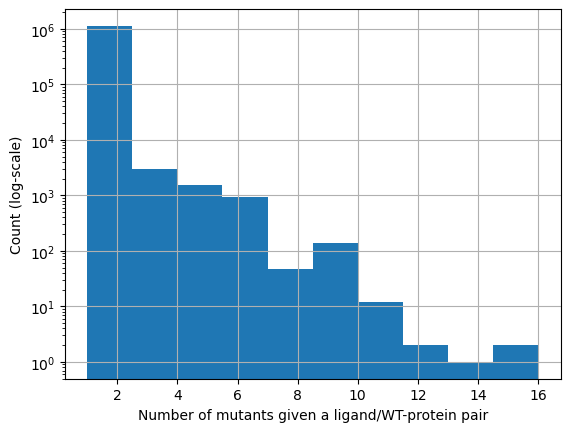

In [8]:
merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).count().reset_index()['Target Name'].hist(log=True)
plt.xlabel('Number of mutants given a ligand/WT-protein pair')
plt.ylabel('Count (log-scale)');

In [9]:
filtered_df = merged_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain']).filter(lambda x: len(x) >= 2)
mutants_filtered_df = filtered_df.groupby(['Ligand SMILES', 'UniProt (SwissProt) Entry Name of Target Chain'])['Target Name'].apply(list).reset_index()
mutants_filtered_df.to_csv('mutants_24_11_08_only_exact_values.csv')
mutants_filtered_df.head()

,Ligand SMILES,UniProt (SwissProt) Entry Name of Target Chain,Target Name
0,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
1,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,JAK2_HUMAN,"[Tyrosine-protein kinase JAK2 [828-1132], Tyro..."
2,Brc1cc2c(NC(=O)C3CC3)n[nH]c2nc1-c1cccs1,CDK2_HUMAN,"[Cyclin-A2/Cyclin-dependent kinase 2, Cyclin-d..."
3,Brc1ccc(CCN2C(=O)COc3ccc(\C=C4/SC(=S)NC4=O)cc2...,PK3CG_HUMAN,"[Phosphatidylinositol 4,5-bisphosphate 3-kinas..."
4,Brc1ccc(NC(=O)[C@@H]2C[C@@H](CN2)n2cc(nn2)-c2c...,ABL1_HUMAN,[Breakpoint cluster region protein/Tyrosine-pr...


In [11]:
filtered_df

,Ligand SMILES,Target Name,BindingDB Target Chain Sequence,UniProt (SwissProt) Entry Name of Target Chain,IC50 (nM)
489,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,Tyrosine-protein kinase JAK2 [828-1132],ALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQDN...,JAK2_HUMAN,30.00
490,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,Tyrosine-protein kinase JAK2 [828-1132],GALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQD...,JAK2_HUMAN,21.25
492,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,Tyrosine-protein kinase JAK2 [828-1132],ALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQDN...,JAK2_HUMAN,30.00
493,Brc1cc(CN2CCC(CC2)N2CC(CC#N)(C2)n2cc(cn2)-c2nc...,Tyrosine-protein kinase JAK2 [828-1132],GALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQD...,JAK2_HUMAN,21.25
645,Brc1cc2c(NC(=O)C3CC3)n[nH]c2nc1-c1cccs1,Cyclin-A2/Cyclin-dependent kinase 2,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,CDK2_HUMAN,639.00
...,...,...,...,...,...
1171701,c1cnc2c(c1)ccc1cccnc21,Collagenase 3,MHPGVLAAFLFLSWTHCRALPLPSGGDEDDLSEEDLQFAERYLRSY...,MMP13_HUMAN,4000.00
1171702,c1cnc2c(c1)ccc1cccnc21,Collagenase 3 (MMP13),MHPGVLAAFLFLSWTHCRALPLPSGGDEDDLSEEDLQFAERYLRSY...,MMP13_HUMAN,4000.00
1171852,c1n[nH]c2ccccc12,Cyclin-A1/Cyclin-A2/Cyclin-dependent kinase 2,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,CDK2_HUMAN,185000.00
1171853,c1n[nH]c2ccccc12,Cyclin-A2/Cyclin-dependent kinase 2,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,CDK2_HUMAN,185000.00
